Описание в data/w3_08_statement-logistic.pdf

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def save_answer(name, value):
    with open('data/statement-svm-texts_' + name + '.txt', 'w', encoding='utf-8') as f:
        f.write(value)

In [5]:
df = pd.read_csv('data/data-logistic.csv', header=None)

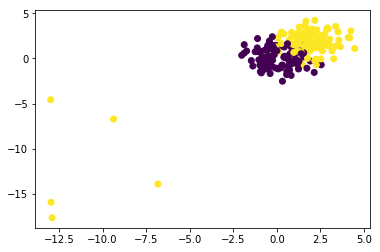

In [11]:
plt.scatter(df[1], df[2], c=df[0])

In [ ]:
class Gradient Descent:
    def __init__(self):